In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
from matplotlib import rcParams

In [2]:
font1 = {'family':'serif','color':'black','size':24}


In [3]:
df = pd.read_csv(r'C:\Users\Feele\Documents\Data\Sunderland\2122\Home\Crewe.csv')

In [4]:
df = df[df['teamId']==16]
df = df[df['type/displayName']=='Pass']
df = df[(df['y']>0) & (df['y'] <100)] #eliminate throws

In [5]:
df['name'].value_counts(dropna = False)

Wright        94
Cirkin        65
Evans         57
Winchester    51
Matete        50
Clarke        46
Patterson     31
ONien         29
Neil          24
Gooch         21
Stewart       20
Roberts       15
Dajaku        10
Defoe          5
Name: name, dtype: int64

In [6]:
df = df[df['name']=='Cirkin'] #player

In [7]:
# Inflating X and Y to pitch size (statsbomb pitches don't match with WhoScored data)

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8

In [8]:
df1 = df.loc[df['outcomeType/displayName']=='Successful'].reset_index()
df2 = df.loc[df['outcomeType/displayName']=='Unsuccessful'].reset_index()
df3 = df.loc[df['type/value']=='Assist'].reset_index()

In [9]:
df1['outcomeType/displayName'].value_counts(dropna = False)

Successful    51
Name: outcomeType/displayName, dtype: int64

In [10]:
df2['outcomeType/displayName'].value_counts(dropna = False)

Unsuccessful    14
Name: outcomeType/displayName, dtype: int64

In [11]:
df3['outcomeType/displayName'].value_counts(dropna = False)

Series([], Name: outcomeType/displayName, dtype: int64)

In [12]:
font1 = {'family':'Consolas','color':'black','size':24}

In [17]:
pitch = Pitch(pitch_type='statsbomb',
              line_color='black',
              pitch_color='white')

Text(0.185, 0.04, '@BrandonFeeley97 / data via whoscored.com')

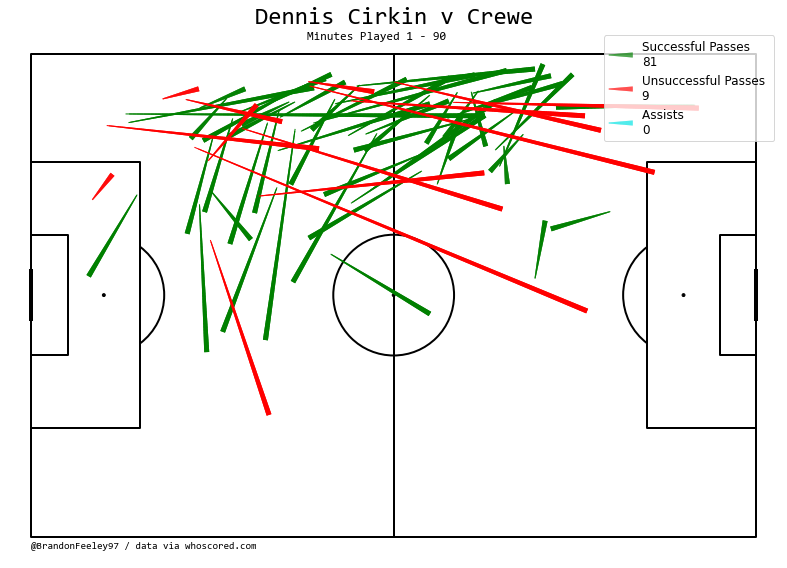

In [18]:
fig,ax = pitch.draw(figsize=(16,8))
plt.gca().invert_yaxis()


pl1 = pitch.lines(df1.x,
                  df1.y,
                  df1.endX,
                  df1.endY,
                  comet=True,
                  ax=ax,
                  color='green',label="Successful Passes \n81")

pl2 = pitch.lines(df2.x,
                  df2.y,
                  df2.endX,
                  df2.endY,
                  comet=True,
                  ax=ax,
                  color='red',label="Unsuccessful Passes \n9 ")

pl3 = pitch.lines(df3.x,
                  df3.y,
                  df3.endX,
                  df3.endY,
                  comet=True,
                  ax=ax,
                  color="#02E5E5",label="Assists \n0") # Change




plt.legend(loc="best",fontsize = 'large') # Legend 
plt.title("Dennis Cirkin v Crewe",fontdict = font1) # Title


line1 = 'Minutes Played 1 - 90'

fig.text(.425,.925,"Minutes Played 1 - 90",font='Consolas',fontsize=12, color="black")
fig.text(.185,.040,"@BrandonFeeley97 / data via whoscored.com", font='Consolas')


#fig.savefig("1.png")


#plt.title("A 2D histogram", fontsize=20, fontweight=0, color='purple', loc='left', style='italic' )